<a href="https://colab.research.google.com/github/knoppin1/DATA-606/blob/main/county_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [ ]:
wd = os.getcwd()
wd

'C:\\Users\\Ken\\Documents\\Ken\\College\\UMBC\\Data_Science\\DATA_606_Capstone_in_Data_Science\\Project'

In [ ]:
os.listdir(wd)

['.ipynb_checkpoints',
 'co-est2019-alldata.csv',
 'county_income.ipynb',
 'county_population.ipynb',
 'lapi1120.xlsx']

Load Census Population Data

In [ ]:
population_file = wd + '\\' + 'co-est2019-alldata.csv'
population_file

'C:\\Users\\Ken\\Documents\\Ken\\College\\UMBC\\Data_Science\\DATA_606_Capstone_in_Data_Science\\Project\\co-est2019-alldata.csv'

In [ ]:
df = pd.read_csv(population_file, encoding='cp1252')
df.shape

(3193, 164)

In [ ]:
df.head(3)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567


In [ ]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df.shape

(3193, 164)

In [ ]:
df = df.filter(['STNAME','CTYNAME','POPESTIMATE2019'], axis=1)
df.columns

Index(['STNAME', 'CTYNAME', 'POPESTIMATE2019'], dtype='object')

In [ ]:
df.rename(columns={'STNAME': 'State', 'CTYNAME': 'County', 'POPESTIMATE2019': 'Population'}, inplace=True)
df

,State,County,Population
0,Alabama,Alabama,4903185
1,Alabama,Autauga County,55869
2,Alabama,Baldwin County,223234
3,Alabama,Barbour County,24686
4,Alabama,Bibb County,22394
5,Alabama,Blount County,57826
6,Alabama,Bullock County,10101
7,Alabama,Butler County,19448
8,Alabama,Calhoun County,113605
9,Alabama,Chambers County,33254


In [ ]:
df.columns

Index(['State', 'County', 'Population'], dtype='object')

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.dtypes

State         object
County        object
Population     int64
dtype: object

In [ ]:
df.describe(include="all")

,State,County,Population
count,3193,3193,3.193000e+03
unique,51,1927,NaN
top,Texas,Washington County,NaN
freq,255,30,NaN
mean,NaN,NaN,2.055995e+05
std,NaN,NaN,1.260310e+06
min,NaN,NaN,8.600000e+01
25%,NaN,NaN,1.112800e+04
50%,NaN,NaN,2.651600e+04
75%,NaN,NaN,7.330900e+04


In [ ]:
states = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida',
          'Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland',
          'Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire',
          'New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania',
          'Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington',
          'West Virginia','Wisconsin','Wyoming']
states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [ ]:
# Drop rows with State totals
df = df[~df['County'].isin(states)]
df.sort_values(by='Population',ascending=False)

,State,County,Population
209,California,Los Angeles County,10039107
624,Illinois,Cook County,5150233
2667,Texas,Harris County,4713325
106,Arizona,Maricopa County,4485414
227,California,San Diego County,3338330
220,California,Orange County,3175692
372,Florida,Miami-Dade County,2716940
2623,Texas,Dallas County,2635516
1884,New York,Kings County,2559903
223,California,Riverside County,2470546


In [ ]:
df.describe(include="all")

,State,County,Population
count,3143,3143,3.143000e+03
unique,51,1877,NaN
top,Texas,Washington County,NaN
freq,254,30,NaN
mean,NaN,NaN,1.046596e+05
std,NaN,NaN,3.335761e+05
min,NaN,NaN,8.600000e+01
25%,NaN,NaN,1.090400e+04
50%,NaN,NaN,2.575800e+04
75%,NaN,NaN,6.811000e+04


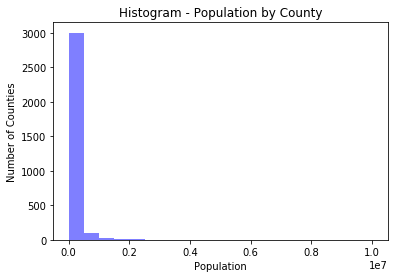

In [ ]:
import matplotlib.pyplot as plt

num_bins = 20
n, bins, patches = plt.hist(df['Population'], num_bins, facecolor='blue', alpha=0.5) 

plt.xlabel('Population')
plt.ylabel('Number of Counties')
plt.title(r'Histogram - Population by County')
plt.show()

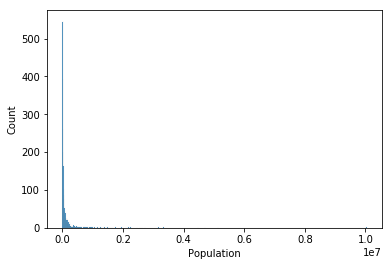

In [ ]:
sns.histplot(data=df, x="Population") 

In [ ]:
# https://onestopdataanalysis.com/python-outlier-detection/
 
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

In [ ]:
 # input data
outliers = detect_outlier((df["Population"]))
len(outliers)

433

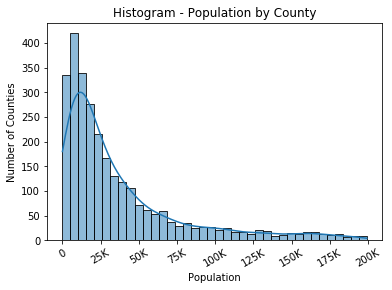

In [ ]:
populations = sorted(df['Population'])

out_threshold = 200000
populations = [i for i in populations if i < out_threshold]

g = sns.histplot(data=populations, kde=True)
g.set_xticklabels(labels=['','0','25K','50K','75K', '100K','125K','150K','175K', '200K'], rotation=30)
g.set_title("Histogram - Population by County")
g.set_xlabel("Population")
g.set_ylabel("Number of Counties")
plt.show()